In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
data=df.copy()

In [5]:
data.shape

(45211, 17)

In [6]:
data.default.replace(('yes','no'),(1,0),inplace=True)

In [7]:
data.housing.replace(('yes','no'),(1,0),inplace=True)

In [8]:
data.loan.replace(('yes','no'),(1,0),inplace=True)

In [9]:
data.y.replace(('yes','no'),(1,0),inplace=True)

In [10]:
data.education.replace(('unknown','primary','secondary','tertiary'),(0,1,2,3),inplace=True)

In [11]:
data.marital.replace(('single','married','divorced'),(0,1,2),inplace=True)

In [12]:
data.drop('job',inplace=True,axis=1)

In [13]:
data.drop('contact',inplace=True,axis=1)

In [14]:
data.drop('day',inplace=True,axis=1)

In [15]:
data.drop('month',inplace=True,axis=1)

In [16]:
data.drop('campaign',inplace=True,axis=1)

In [17]:
data.drop('pdays',inplace=True,axis=1)

In [18]:
data.drop('poutcome',inplace=True,axis=1)

In [19]:
data.drop('previous',inplace=True,axis=1)

In [20]:
data.head()

,age,marital,education,default,balance,housing,loan,duration,y
0,58,1,3,0,2143,1,0,261,0
1,44,0,2,0,29,1,0,151,0
2,33,1,2,0,2,1,1,76,0
3,47,1,0,0,1506,1,0,92,0
4,33,0,0,0,1,0,0,198,0


In [21]:
data.shape

(45211, 9)

In [22]:
X=data.iloc[:,0:8]
Y=data.iloc[:,-1]

In [23]:
X

,age,marital,education,default,balance,housing,loan,duration
0,58,1,3,0,2143,1,0,261
1,44,0,2,0,29,1,0,151
2,33,1,2,0,2,1,1,76
3,47,1,0,0,1506,1,0,92
4,33,0,0,0,1,0,0,198
...,...,...,...,...,...,...,...,...
45206,51,1,3,0,825,0,0,977
45207,71,2,1,0,1729,0,0,456
45208,72,1,2,0,5715,0,0,1127
45209,57,1,2,0,668,0,0,508


In [24]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

[0.18693367 0.01341809 0.01983138 0.00156579 0.29181891 0.02129519
 0.00675806 0.45837892]


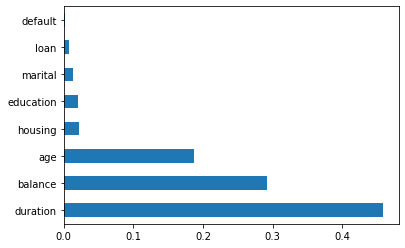

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [27]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
classifier.predict(x_test)

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
classifier.score(x_test,y_test)

0.8891960632533451

In [29]:
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\1234\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
y_pred_df=({'Actual':Y,'Predicted_prob':y_pred})
y_pred_df

{'Actual': 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 45206    1
 45207    1
 45208    1
 45209    0
 45210    0
 Name: y, Length: 45211, dtype: int64,
 'Predicted_prob': array([0, 0, 0, ..., 1, 0, 0], dtype=int64)}

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39198   724]
 [ 4384   905]]


In [33]:
((39197+908)/(39197+725+4381+908))*100

88.70628829267214

In [34]:
from sklearn.metrics import classification_report
classification_report=classification_report(Y,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs=classifier.predict_proba(X)
probs=probs[:,1]

fpr,tpr,threshold=roc_curve(Y,probs)
auc=roc_auc_score(Y,y_pred)
auc

0.5764872433368343

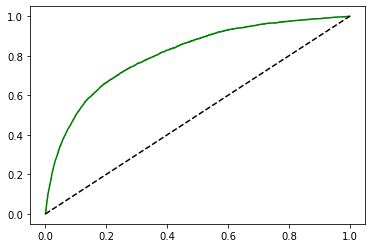

In [36]:
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],'k--')
plt.show()
